In [2]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt
#%matplotlib qt
%matplotlib inline

1440000


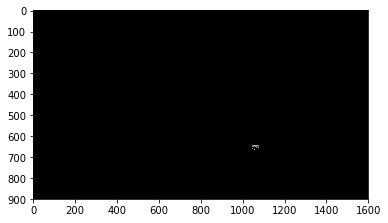

In [104]:
#single img test
img = cv2.imread("./debug_images/510.png")
img0= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img1 = cv2.cvtColor(cv2.imread("./debug_images/509.png"), cv2.COLOR_RGB2GRAY)
dst=cv2.addWeighted(img0,1,img1,-1,0)

ch1 = np.zeros_like(img0)
ch1[dst>0] = 255

ch2 = np.zeros_like(img0)
ch3 = np.zeros_like(img0)

out = np.zeros_like(img)
out[:,:,0]=ch1
out[:,:,1]=ch2
out[:,:,2]=ch3

test = cv2.bitwise_and(out[:,:,0],img1)
cv2.imwrite("./test1_binary.png",out)
print(ch1.size)
plt.imshow(test,'gray')

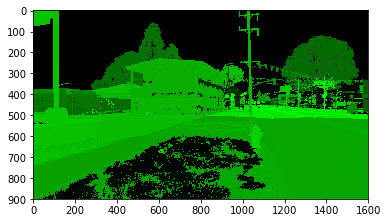

In [179]:
#loop test
png_path = os.listdir('./images')
png_path.sort(key= lambda x:int(x[:-4]))
png_path[0]
current_path = './images/'
counter = 0
add = np.zeros_like(img)
#print(len(png_path))

for i in range(len(png_path)-1):
    counter = counter + 1
    img1_path=current_path+png_path[len(png_path)-i-1]
    img2_path=current_path+png_path[len(png_path)-i-2]
   
    img = cv2.imread(img1_path)
    img1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img2 = cv2.cvtColor(cv2.imread(img2_path),cv2.COLOR_RGB2GRAY)
    dst=cv2.addWeighted(img1,1,img2,-1,0) #灰度 差值图
    
    if(i == 0):
        ch1 = np.zeros_like(img1)
        cho = np.zeros_like(img1)
        ch1[dst>0] = counter
        add[:,:,0] = ch1
        add[:,:,1] = cho
        add[:,:,2] = cho
        continue
    
    img1_path=current_path+png_path[len(png_path)-i-1]
    img2_path=current_path+png_path[len(png_path)-i-2]
   
    img = cv2.imread(img1_path)
    img1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img2 = cv2.cvtColor(cv2.imread(img2_path),cv2.COLOR_RGB2GRAY)
    dst=cv2.addWeighted(img1,1,img2,-1,0) #灰度 差值图

    ####ifdaozhe

    diff = np.zeros_like(img1)
    diff[dst>0] = 200 #将非零处涂成单色 out1

    add_gray = cv2.cvtColor(add,cv2.COLOR_RGB2GRAY)
    mask_add = np.zeros_like(img1)
    mask_add[add_gray>0] = 200

    test_add = cv2.addWeighted(diff,1,cv2.bitwise_and(mask_add,diff),-1,0)#抠掉覆盖的部分

    out = np.zeros_like(img)
    ch1 = np.zeros_like(img1)
    ch2 = np.zeros_like(img1)
    ch3 = np.zeros_like(img1)
    ch1[test_add>0] = counter/255#上一个值
    ch2[test_add>0] = counter%255#上一个值
    out[:,:,0] = ch1
    out[:,:,1] = ch2
    out[:,:,2] = ch3
    add = cv2.add(add,out)
cv2.imwrite("./fixadd.png",add)
plt.imshow(add)

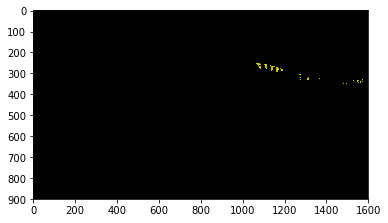

In [133]:
out0 = cv2.imread("./out0.png")#计算好的差值
out1 = cv2.imread("./out1.png")#add
test_add = cv2.addWeighted(out0,1,cv2.bitwise_and(out0,out1),-1,0)

ch1 = np.zeros_like(img1)
ch1[dst>0] = 200
    
cv2.imwrite("./test_add.png",test_add)
plt.imshow(test_add)

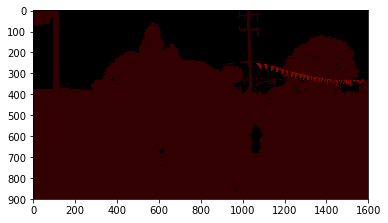

In [174]:
add = np.zeros_like(img)
i=0
img1_path=current_path+png_path[len(png_path)-i-1]
img2_path=current_path+png_path[len(png_path)-i-2]
   
img = cv2.imread(img1_path)
img1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img2 = cv2.cvtColor(cv2.imread(img2_path),cv2.COLOR_RGB2GRAY)
dst=cv2.addWeighted(img1,1,img2,-1,0) #灰度 差值图

if(i == 0): #i为0时 add直接就是最后一侦的遮罩
    ch1 = np.zeros_like(img1)
    cho = np.zeros_like(img1)
    ch1[dst>0] = 150
    add[:,:,0] = ch1
    add[:,:,1] = cho
    add[:,:,2] = cho
#    continue
    
#plt.imshow(add,'gray')#out0

i=1    
img1_path=current_path+png_path[len(png_path)-i-1]
img2_path=current_path+png_path[len(png_path)-i-2]
   
img = cv2.imread(img1_path)
img1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img2 = cv2.cvtColor(cv2.imread(img2_path),cv2.COLOR_RGB2GRAY)
dst=cv2.addWeighted(img1,1,img2,-1,0) #灰度 差值图

####ifdaozhe

diff = np.zeros_like(img1)
diff[dst>0] = 200 #将非零处涂成单色 out1

add_gray = cv2.cvtColor(add,cv2.COLOR_RGB2GRAY)
mask_add = np.zeros_like(img1)
mask_add[add_gray>0] = 200



#test_add = cv2.addWeighted(out0,1,cv2.bitwise_and(out0,out1),-1,0)
test_add = cv2.addWeighted(diff,1,cv2.bitwise_and(mask_add,diff),-1,0)#抠掉覆盖的部分

out = np.zeros_like(img)
ch1 = np.zeros_like(img1)
cho = np.zeros_like(img1)
ch1[test_add>0] = 50#上一个值
out[:,:,0] = ch1
out[:,:,1] = cho
out[:,:,2] = cho


add = cv2.add(add,out)
plt.imshow(,'gray')#out0